In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
file_path = r'C:\Users\bisht\Downloads\census+income\adult.data'

df = pd.read_csv(file_path, header=None)
col=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']
len(col)

15

In [3]:
df.columns=col
df = df.applymap(lambda x: np.nan if str(x).strip() == '?' else x)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df=df.drop(columns=['fnlwgt'])

In [5]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


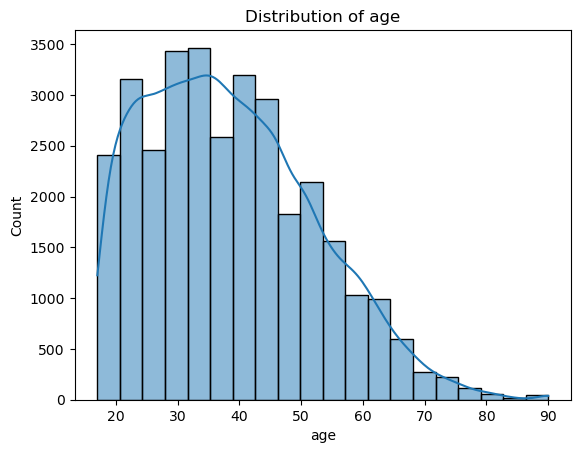

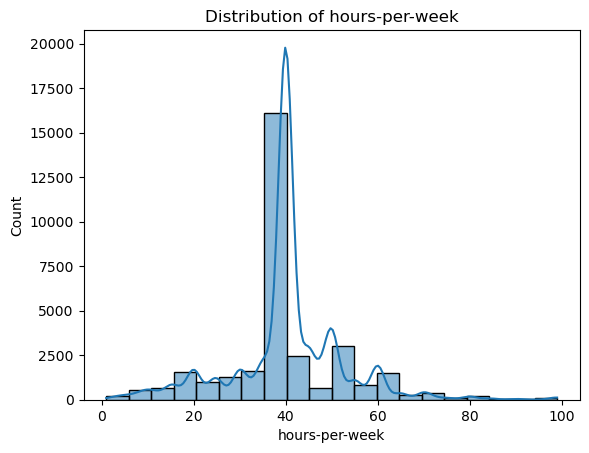

In [6]:
num_col=['age','hours-per-week']
for col in num_col:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

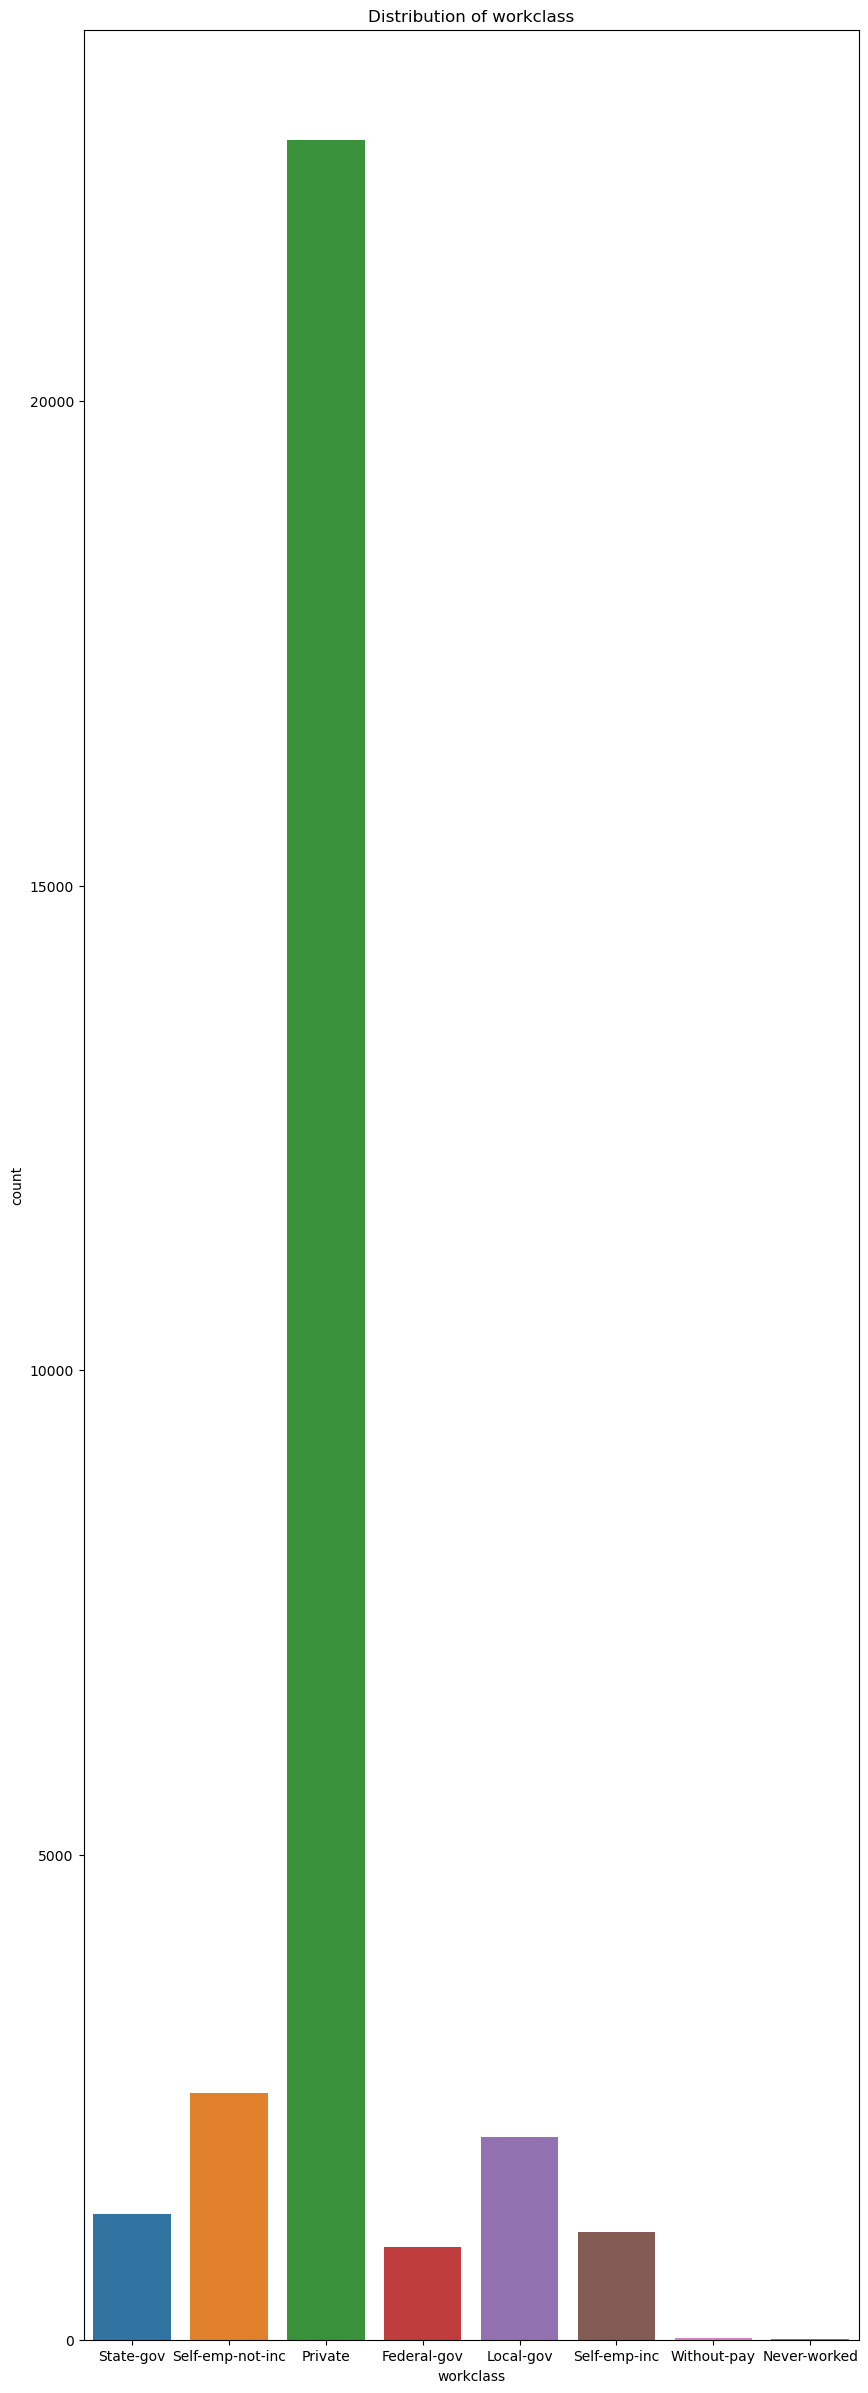

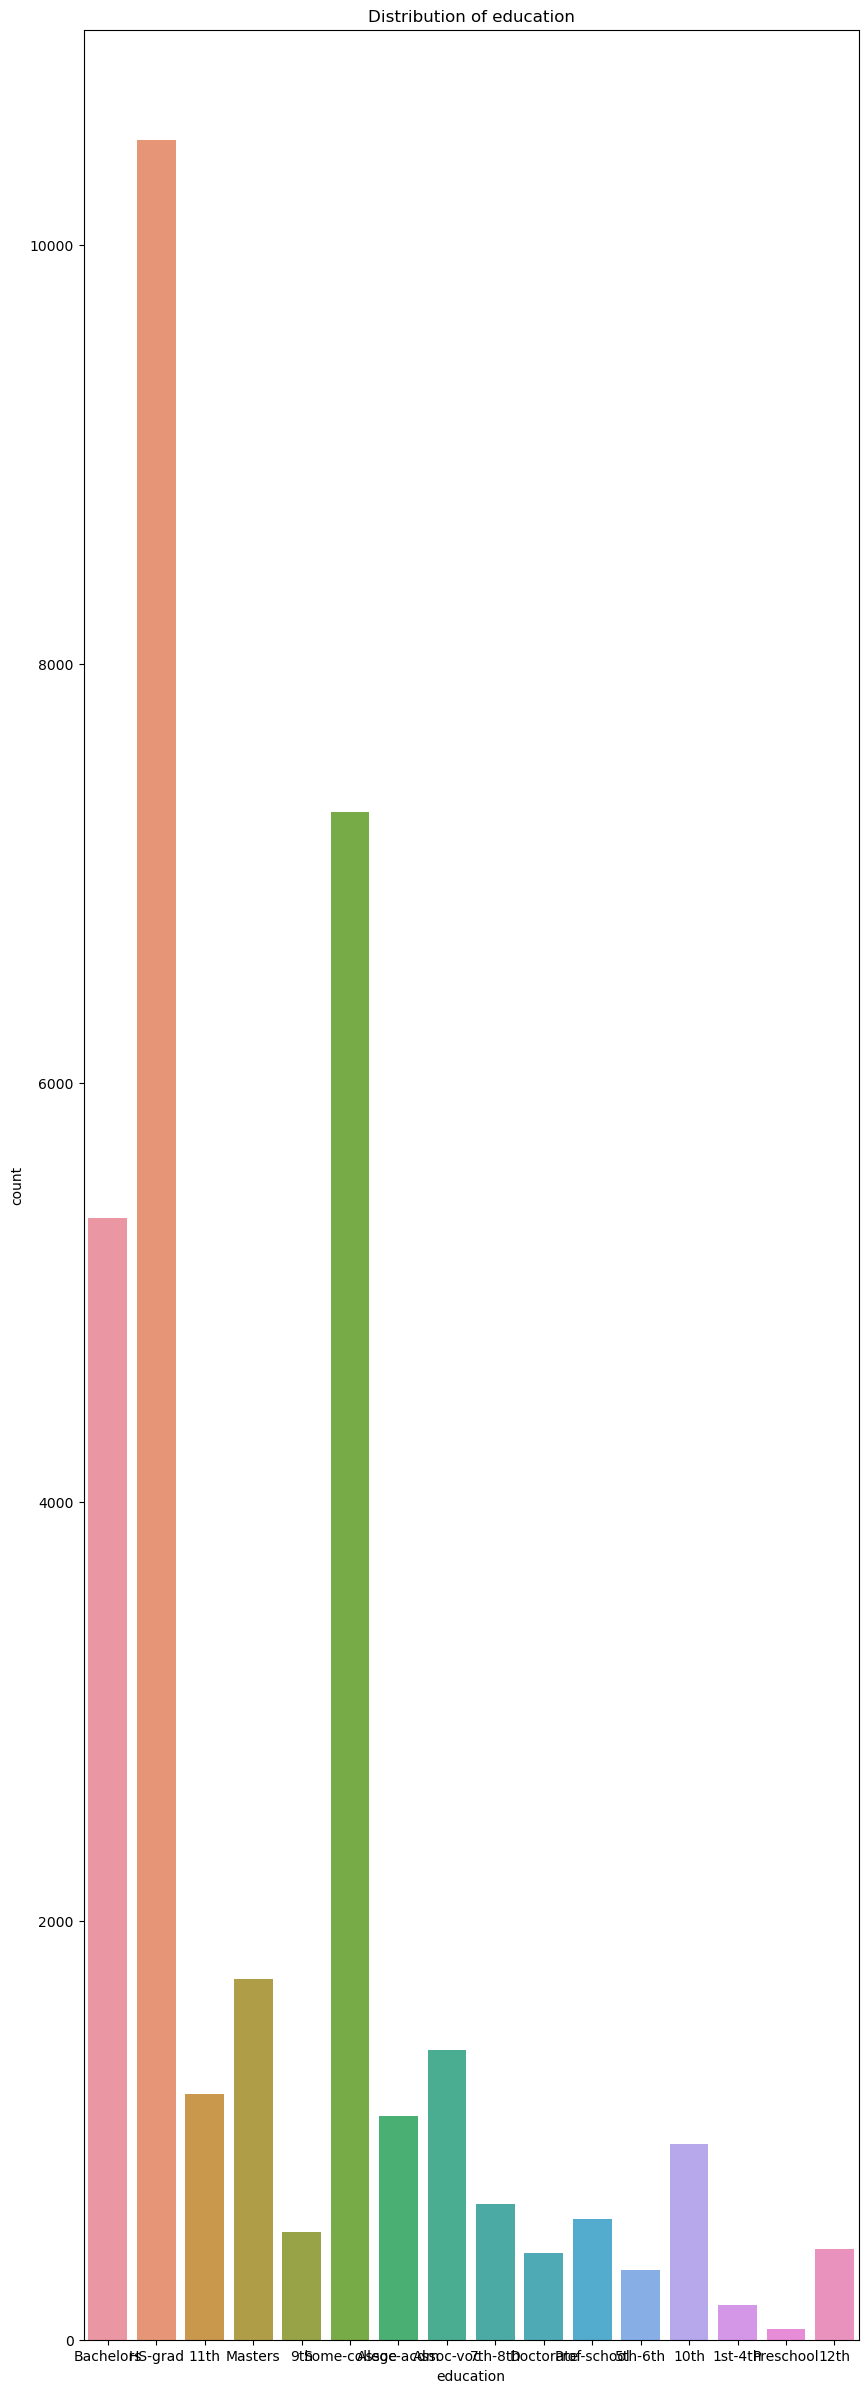

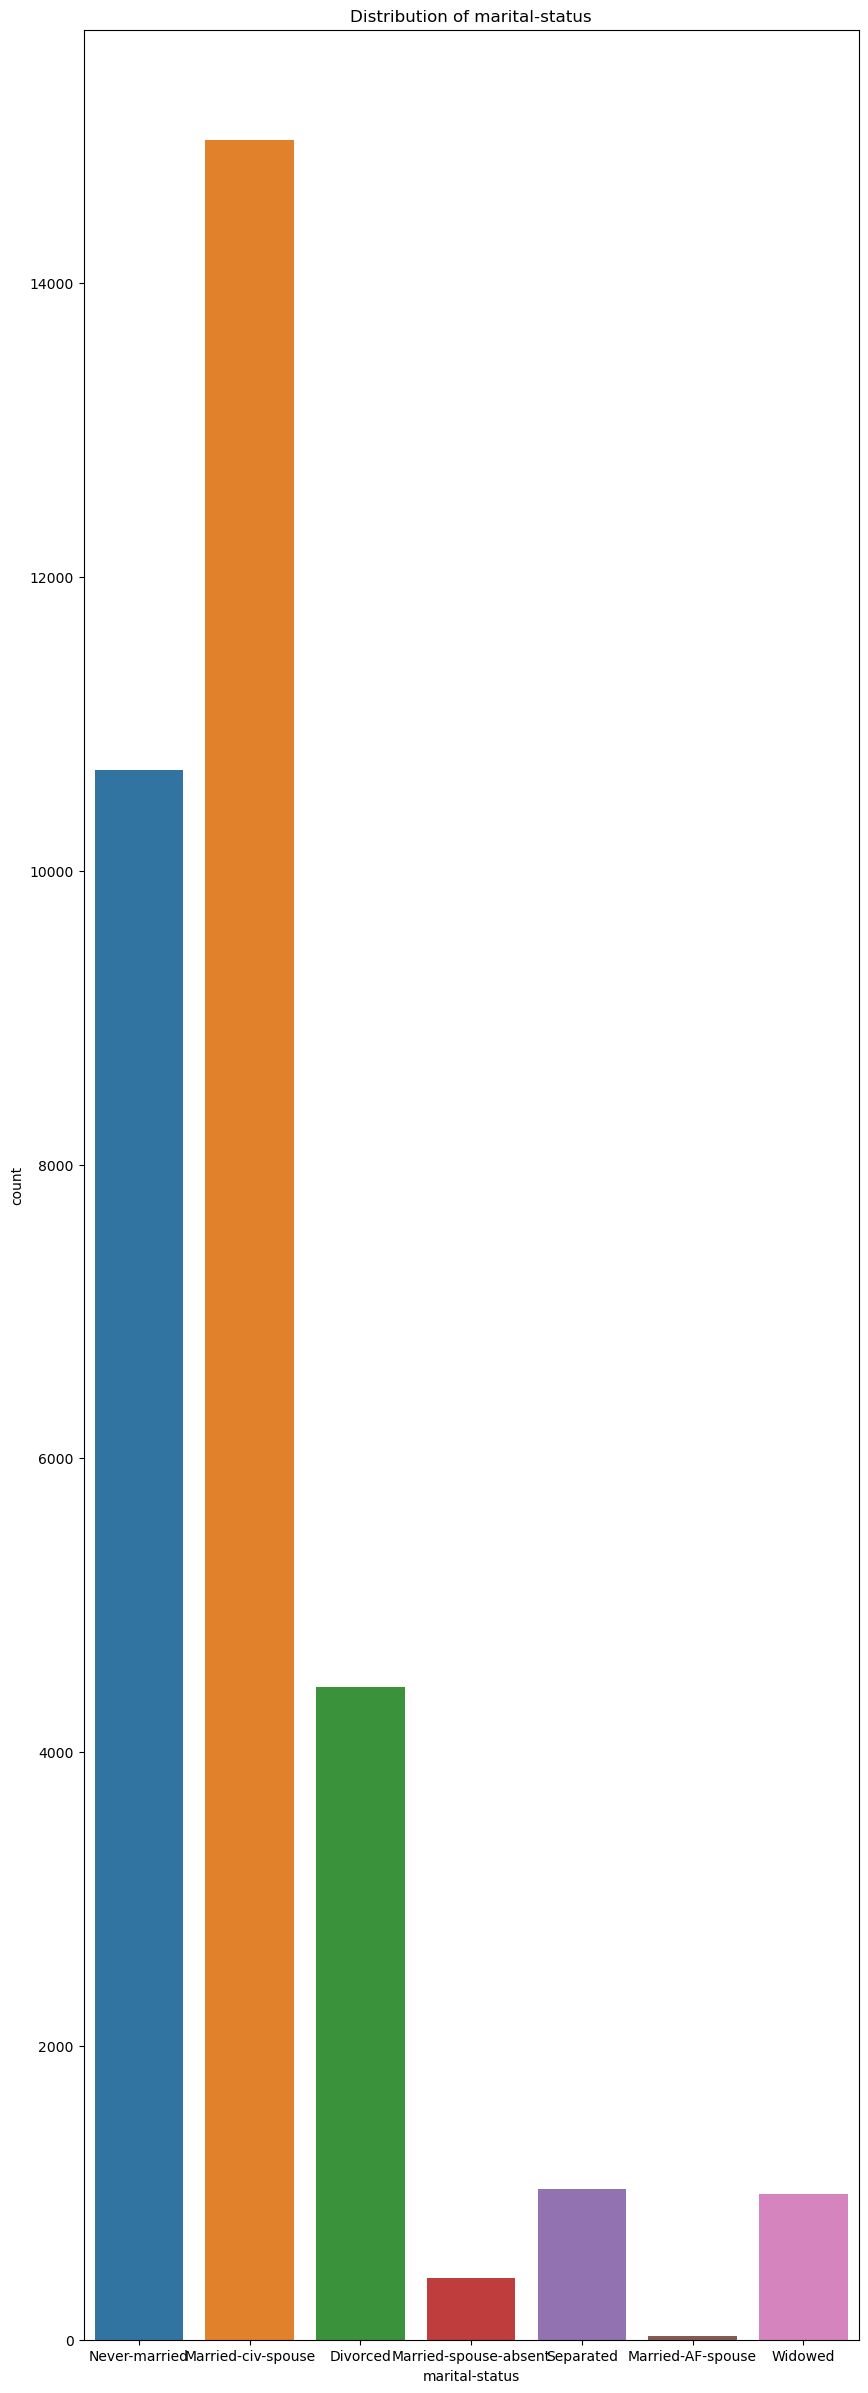

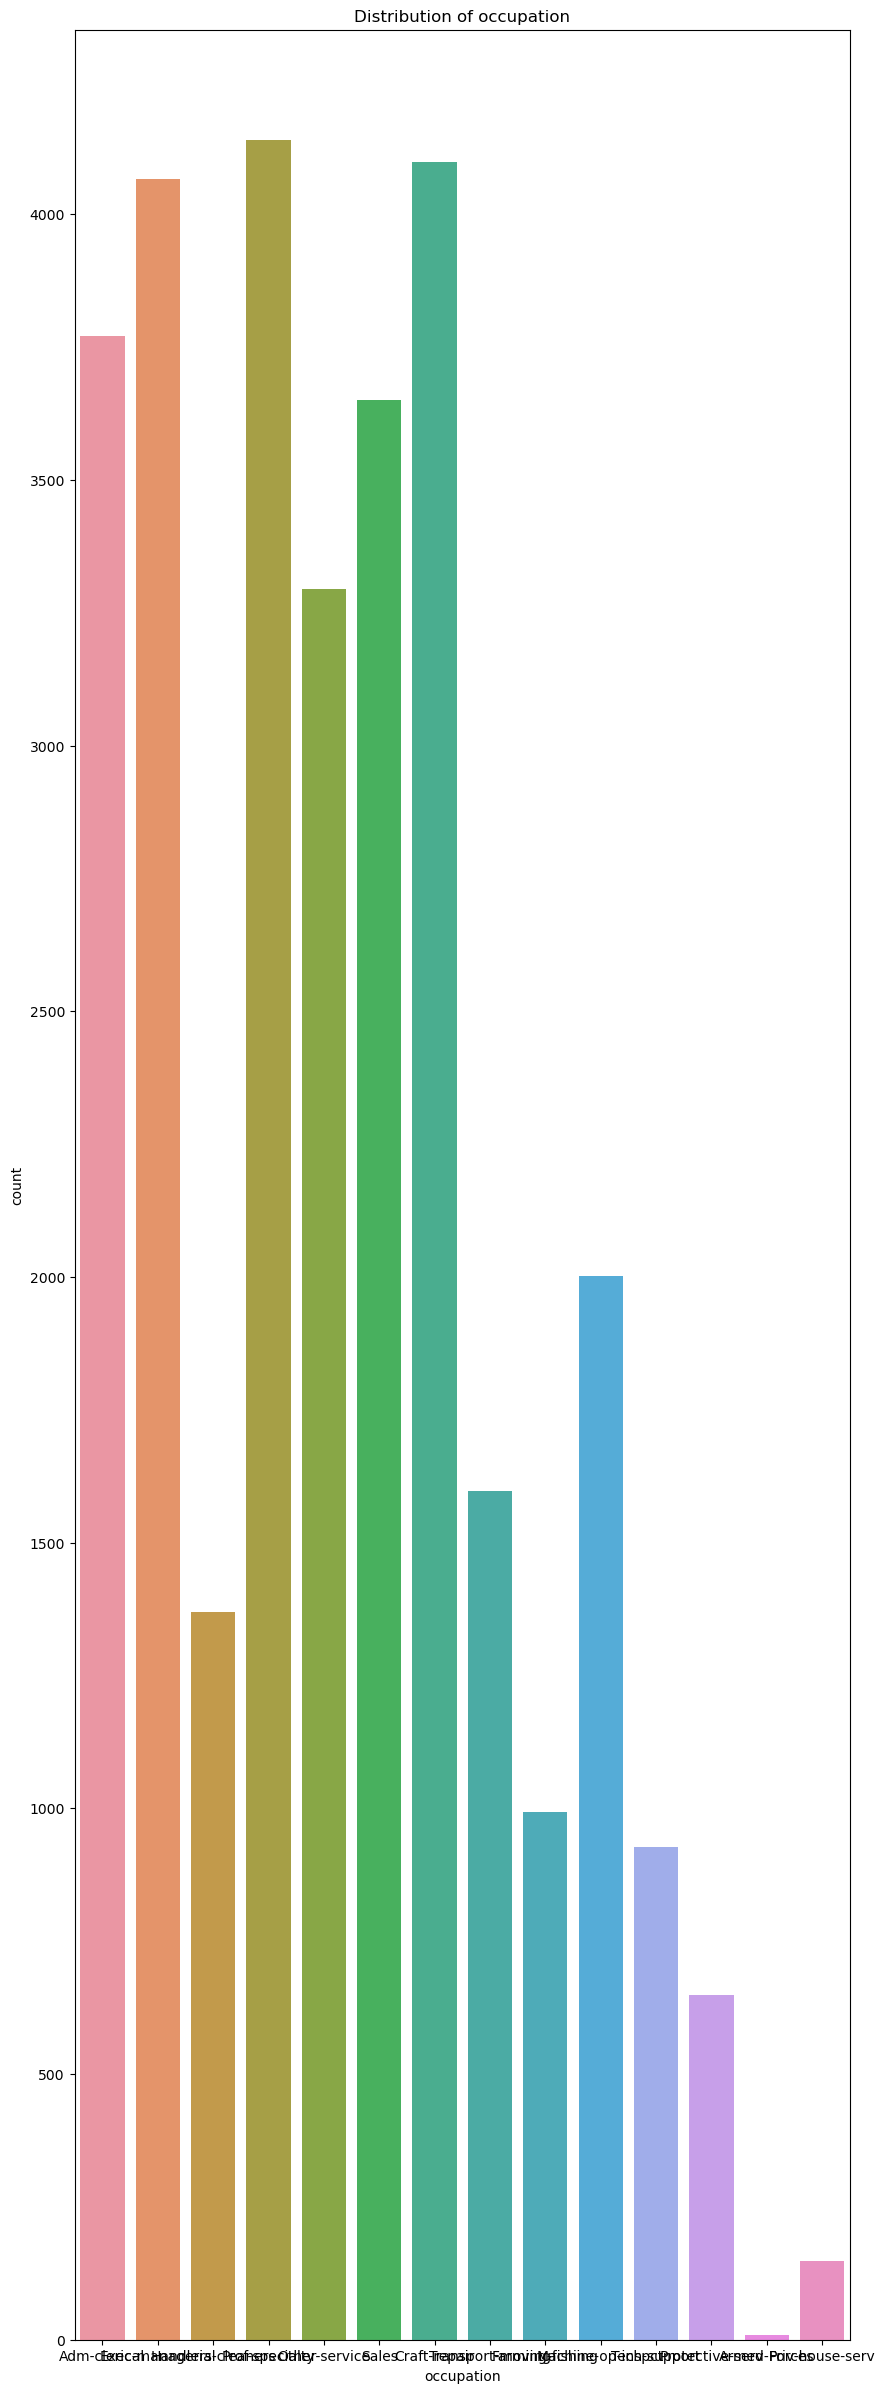

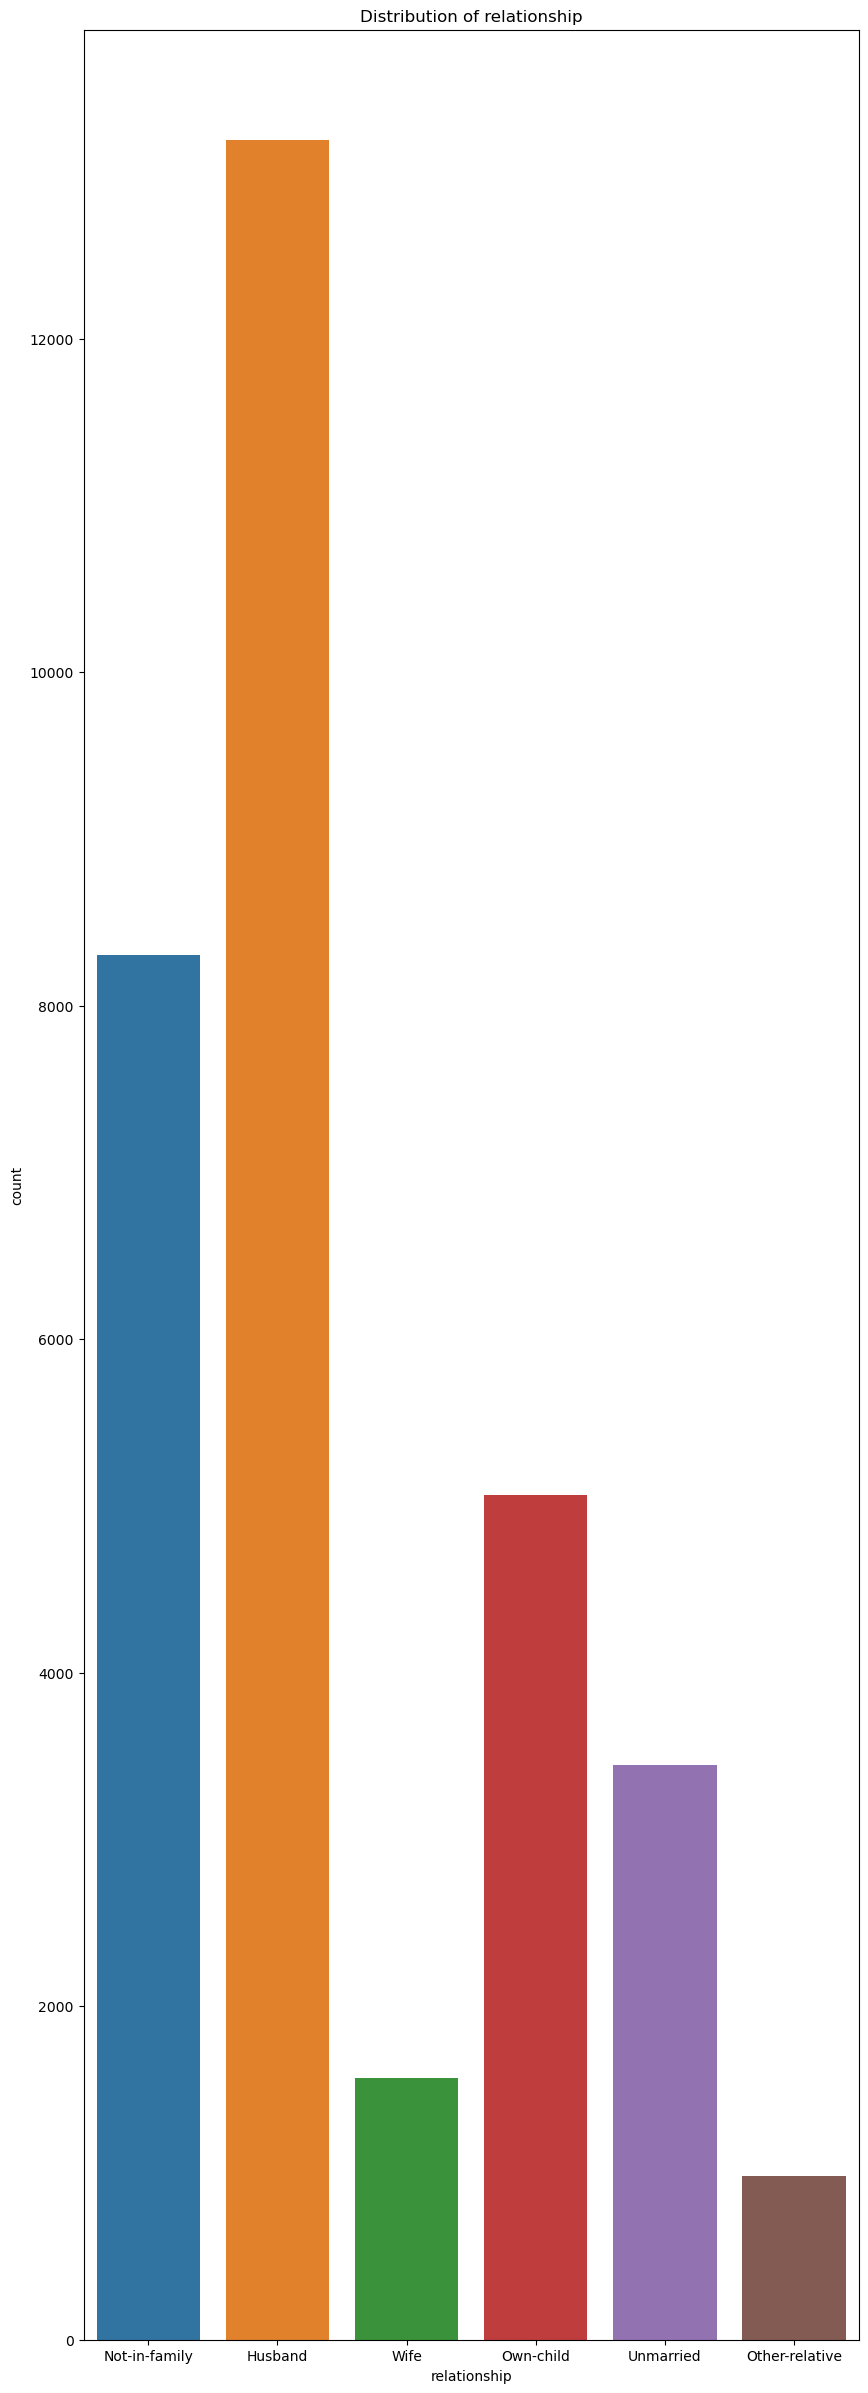

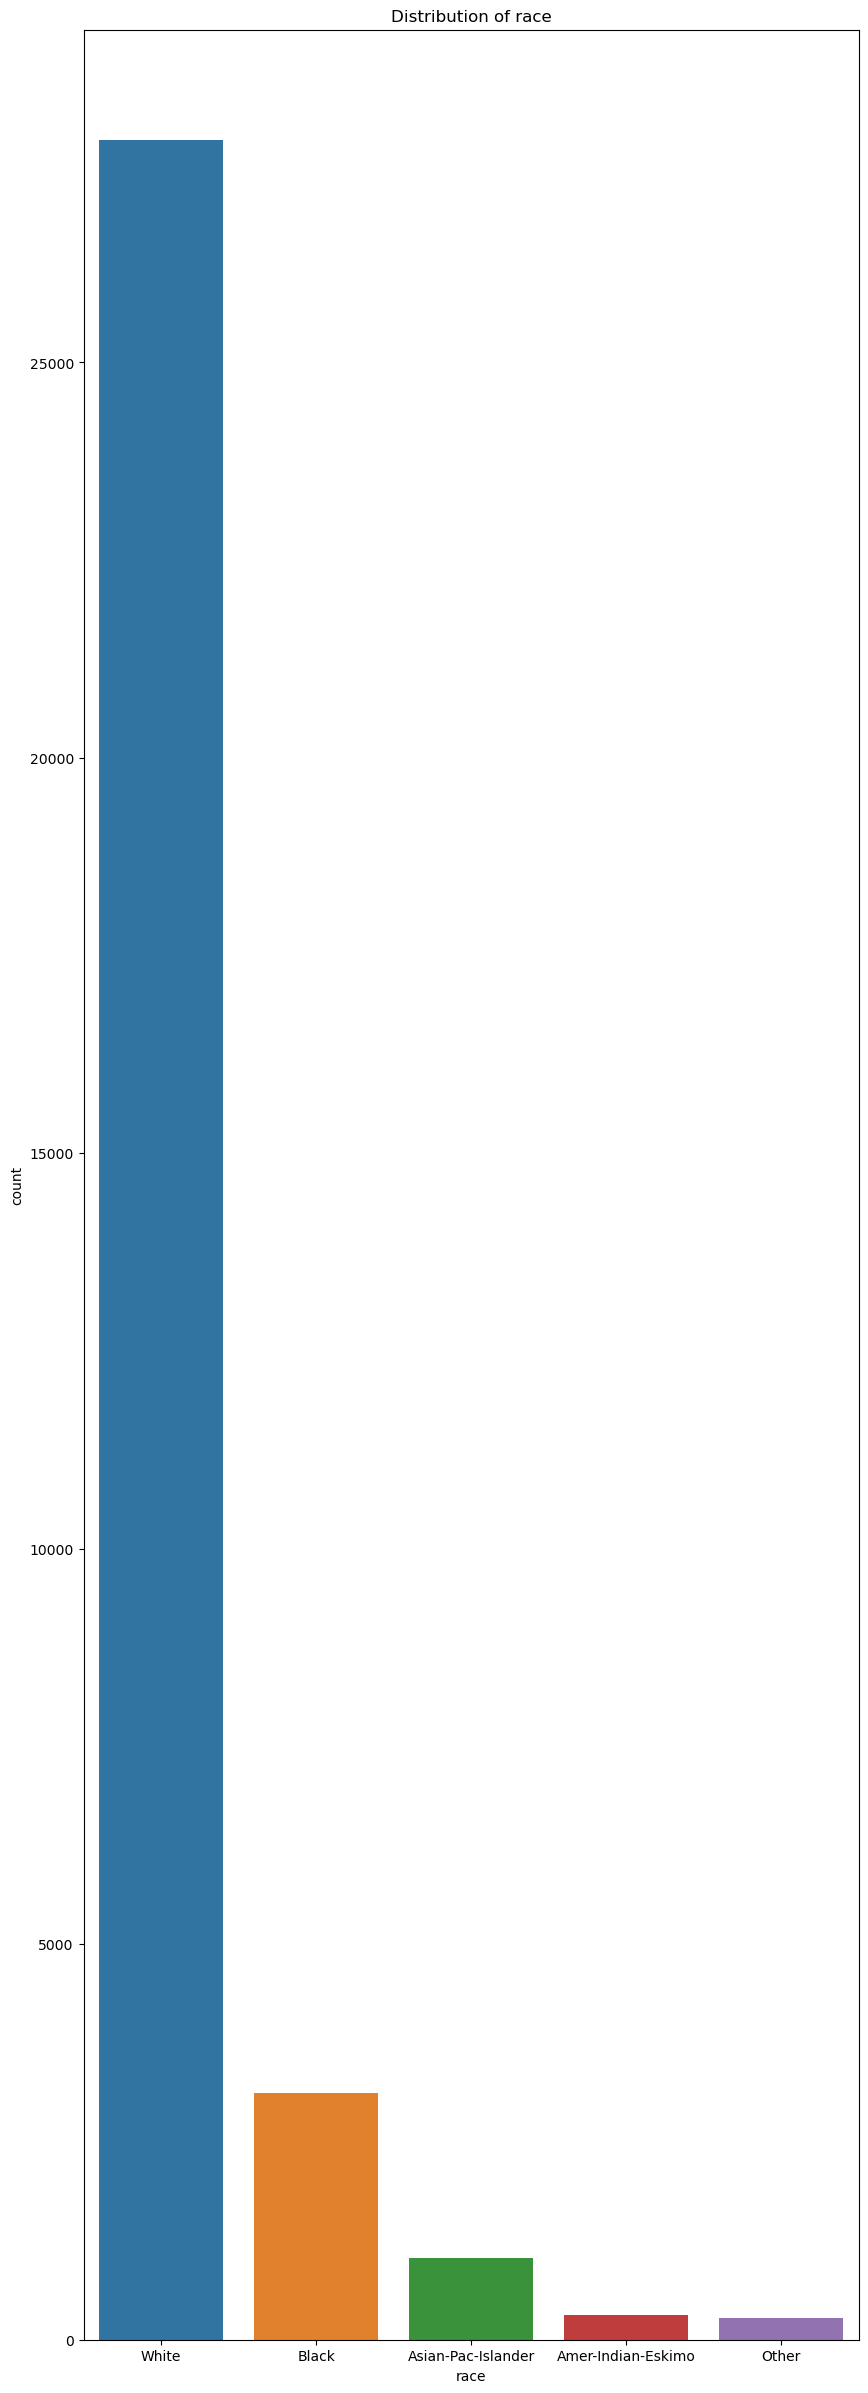

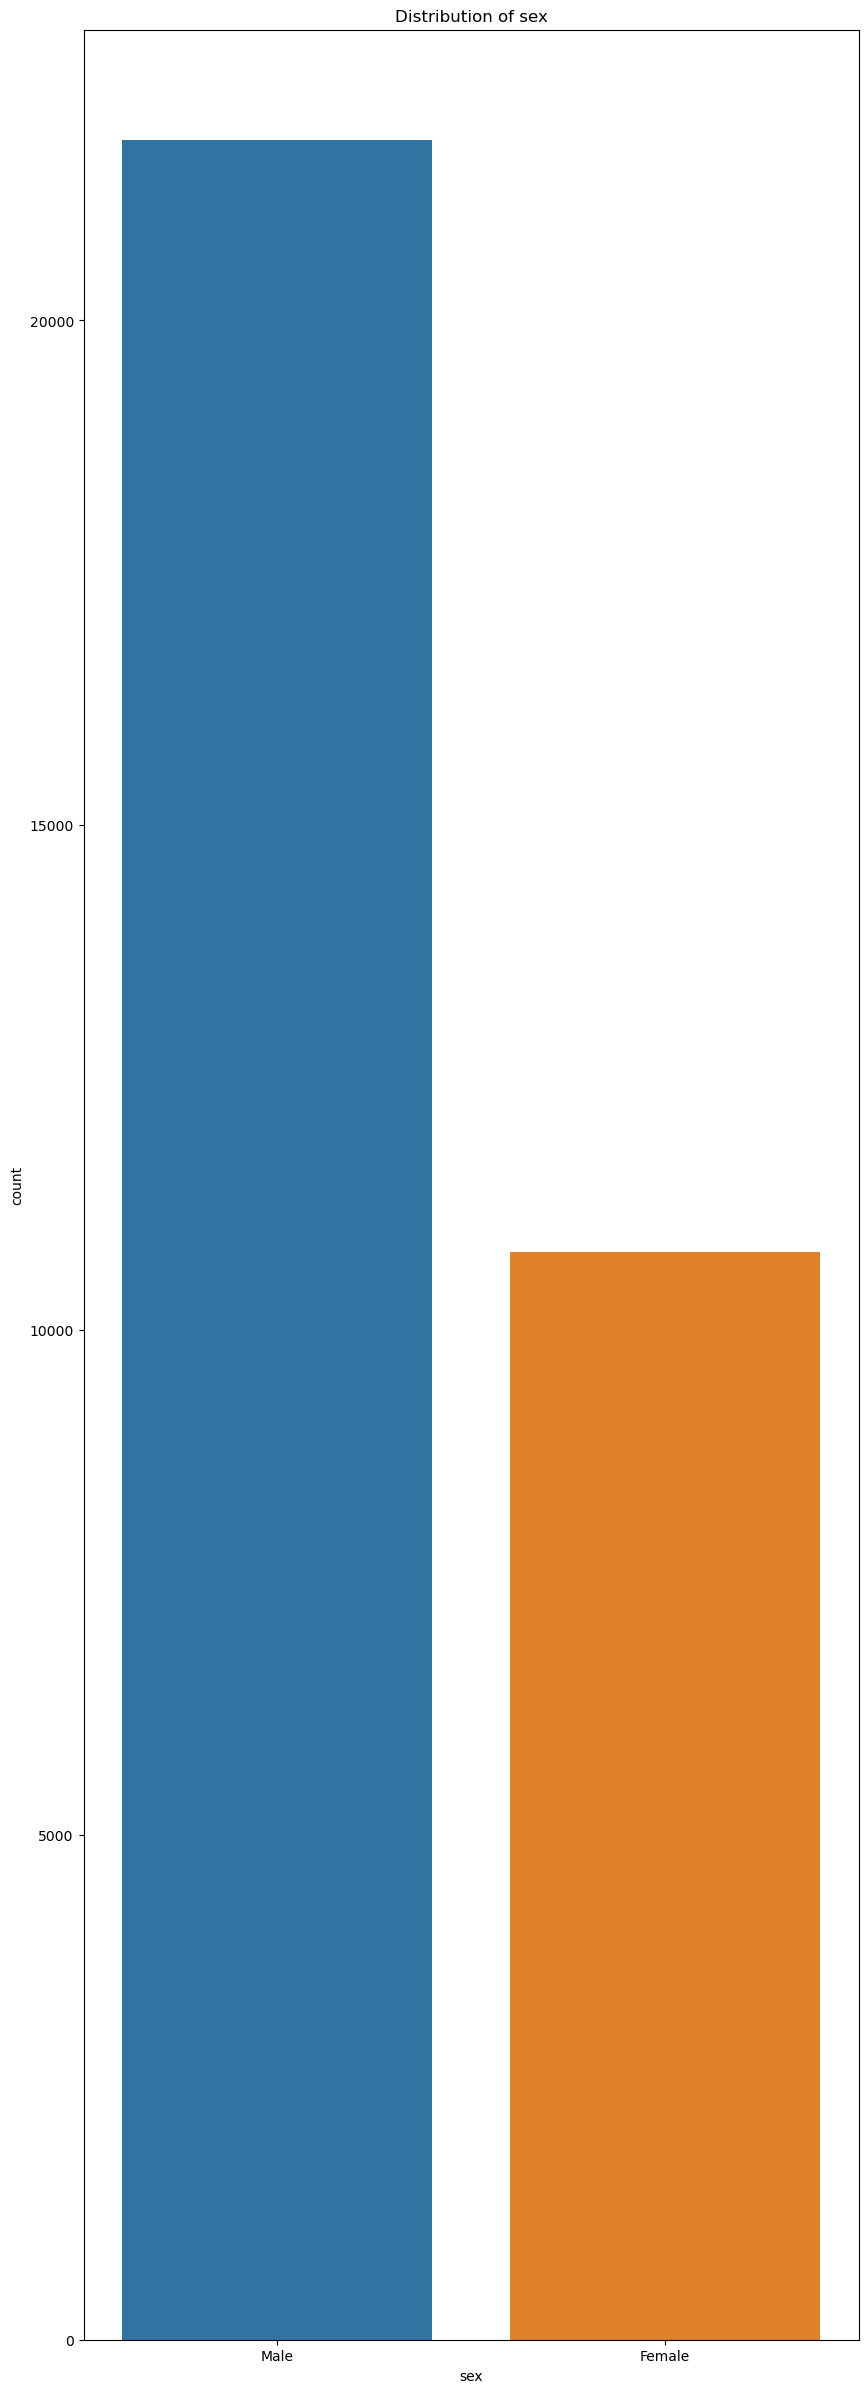

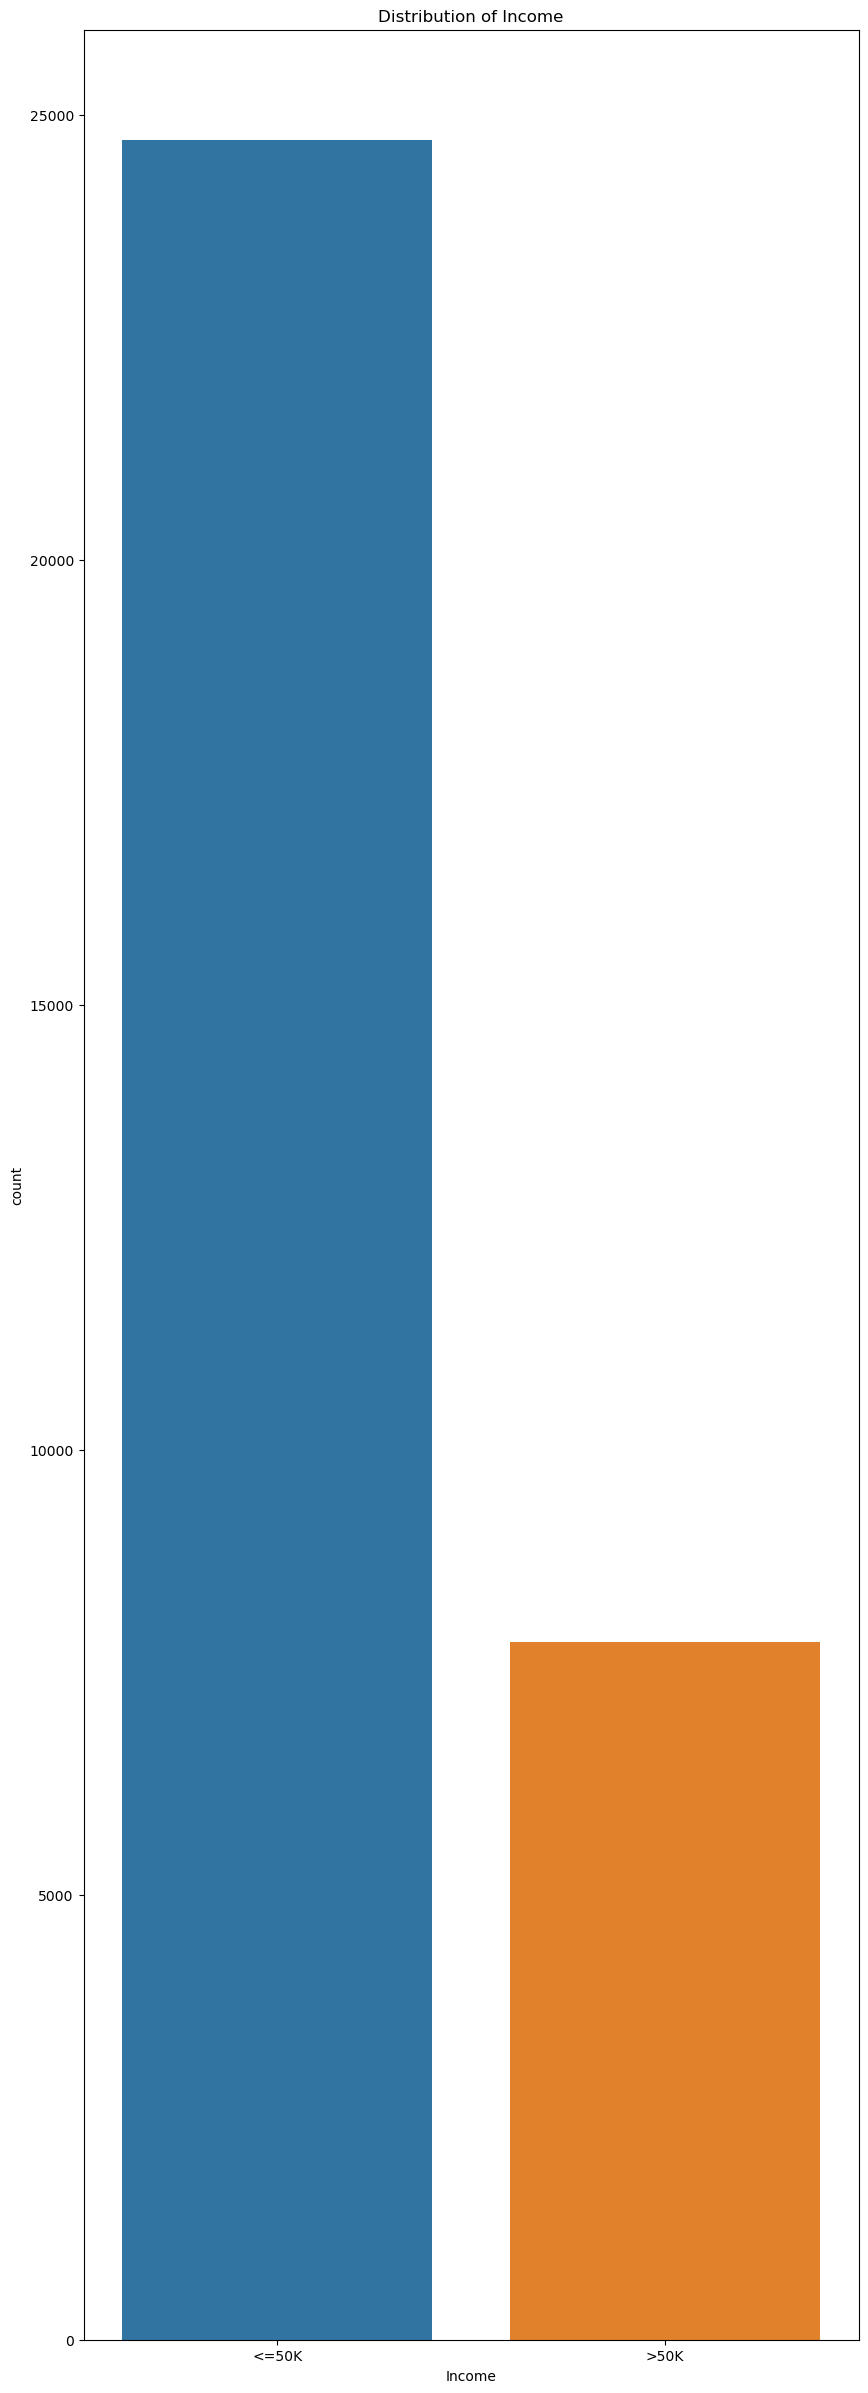

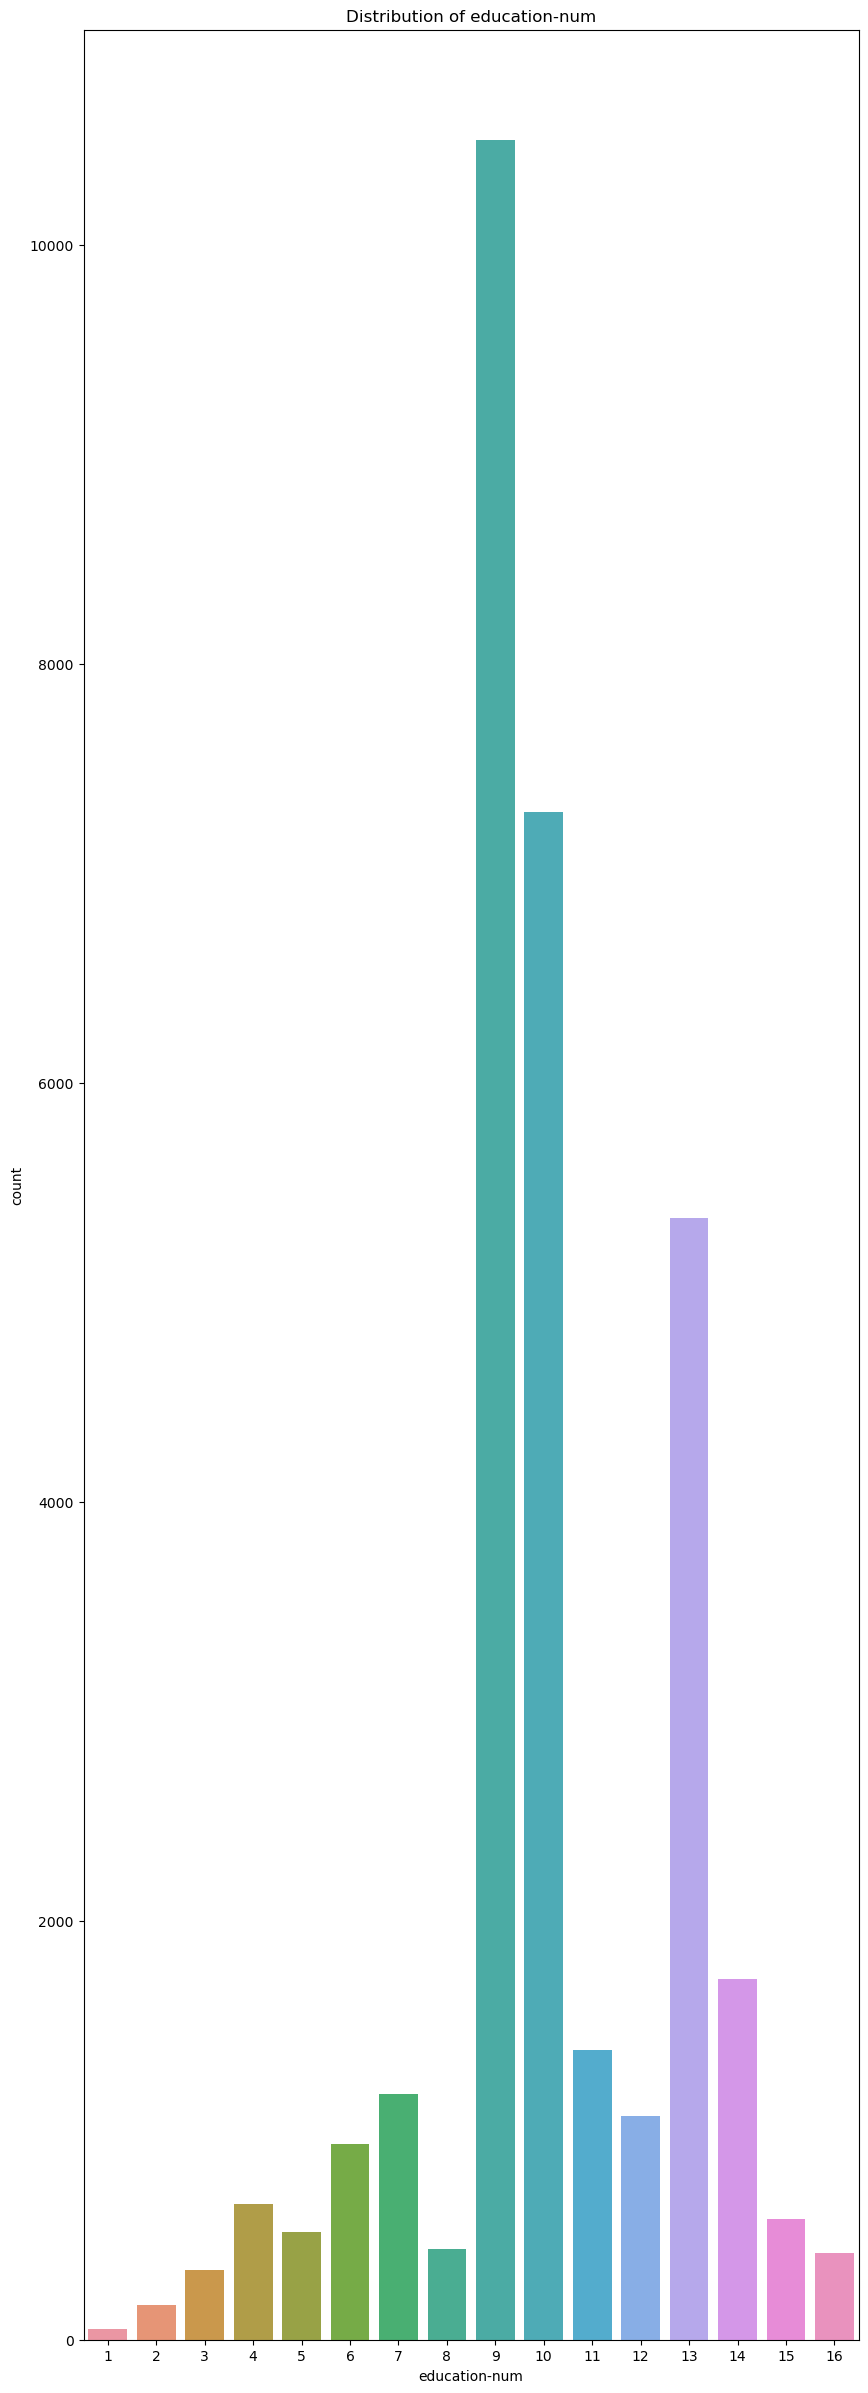

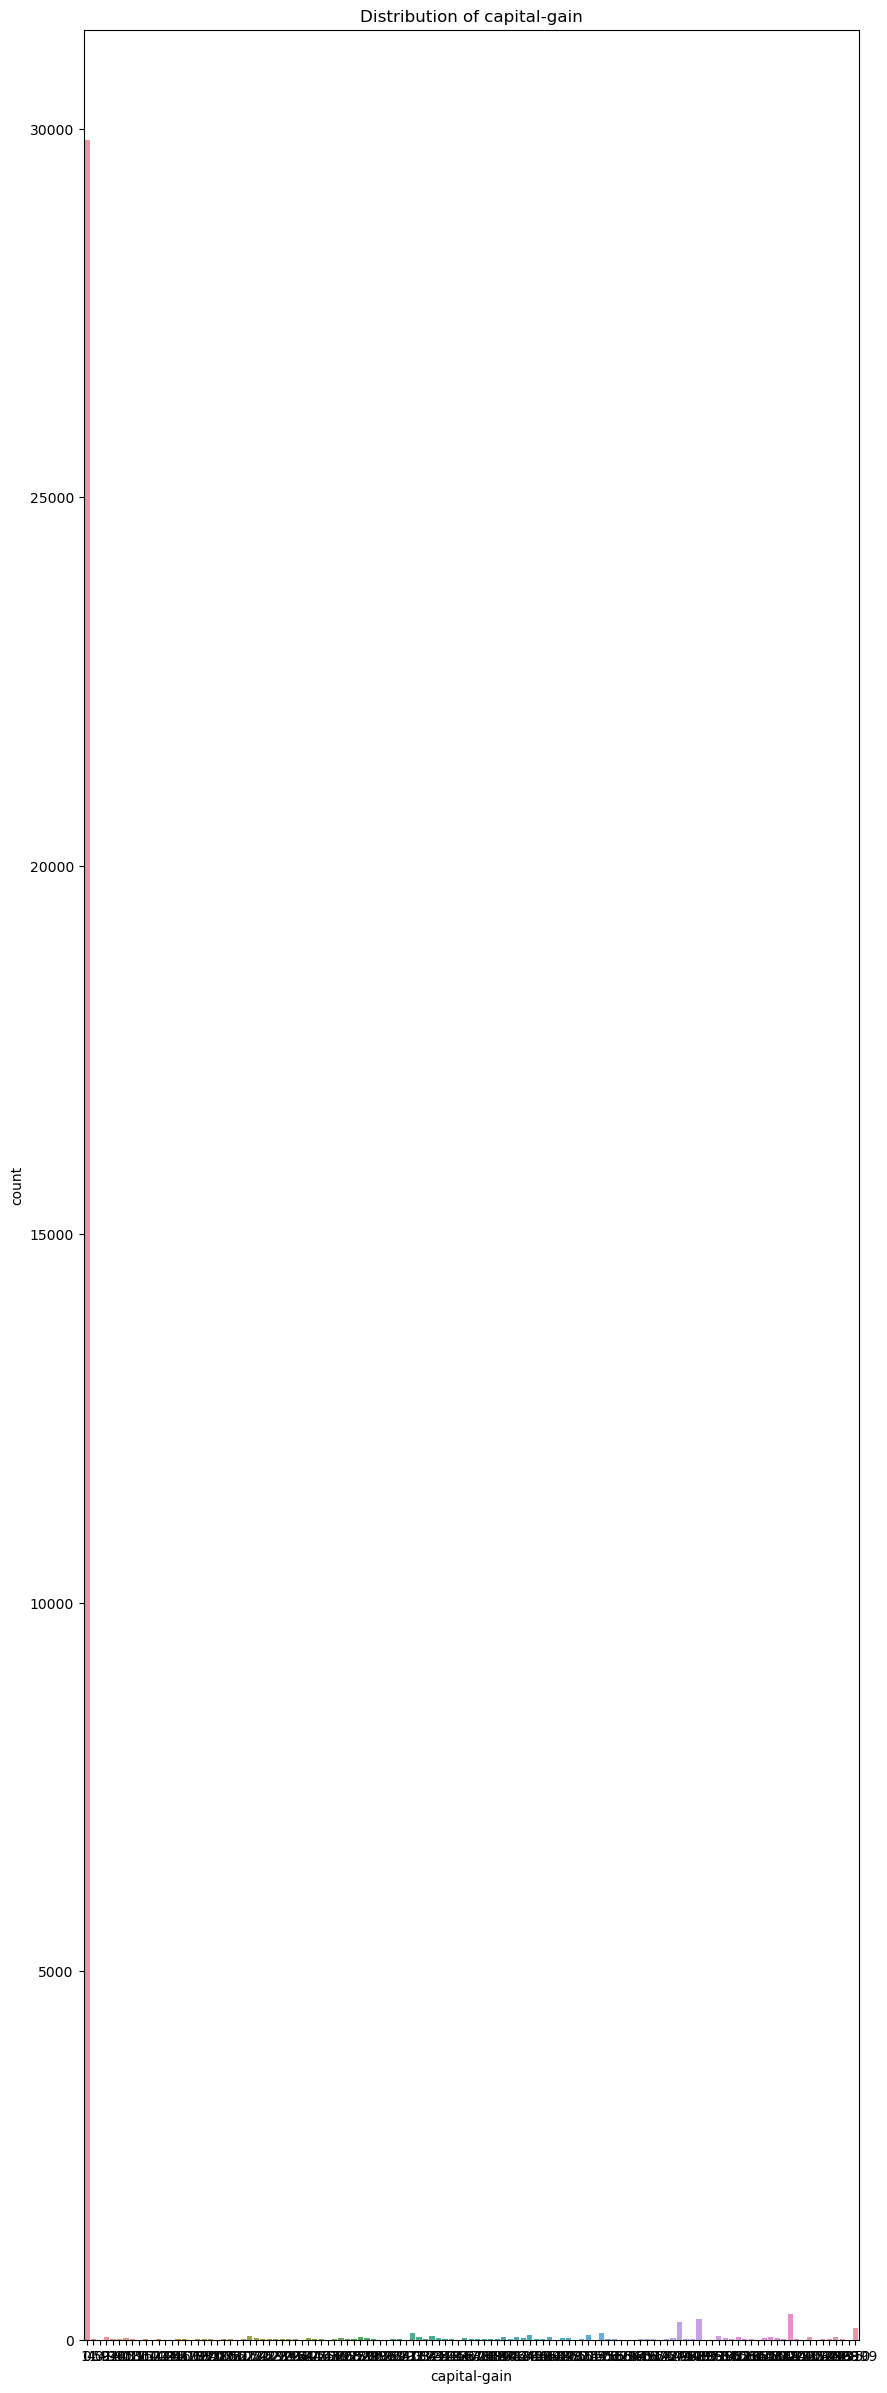

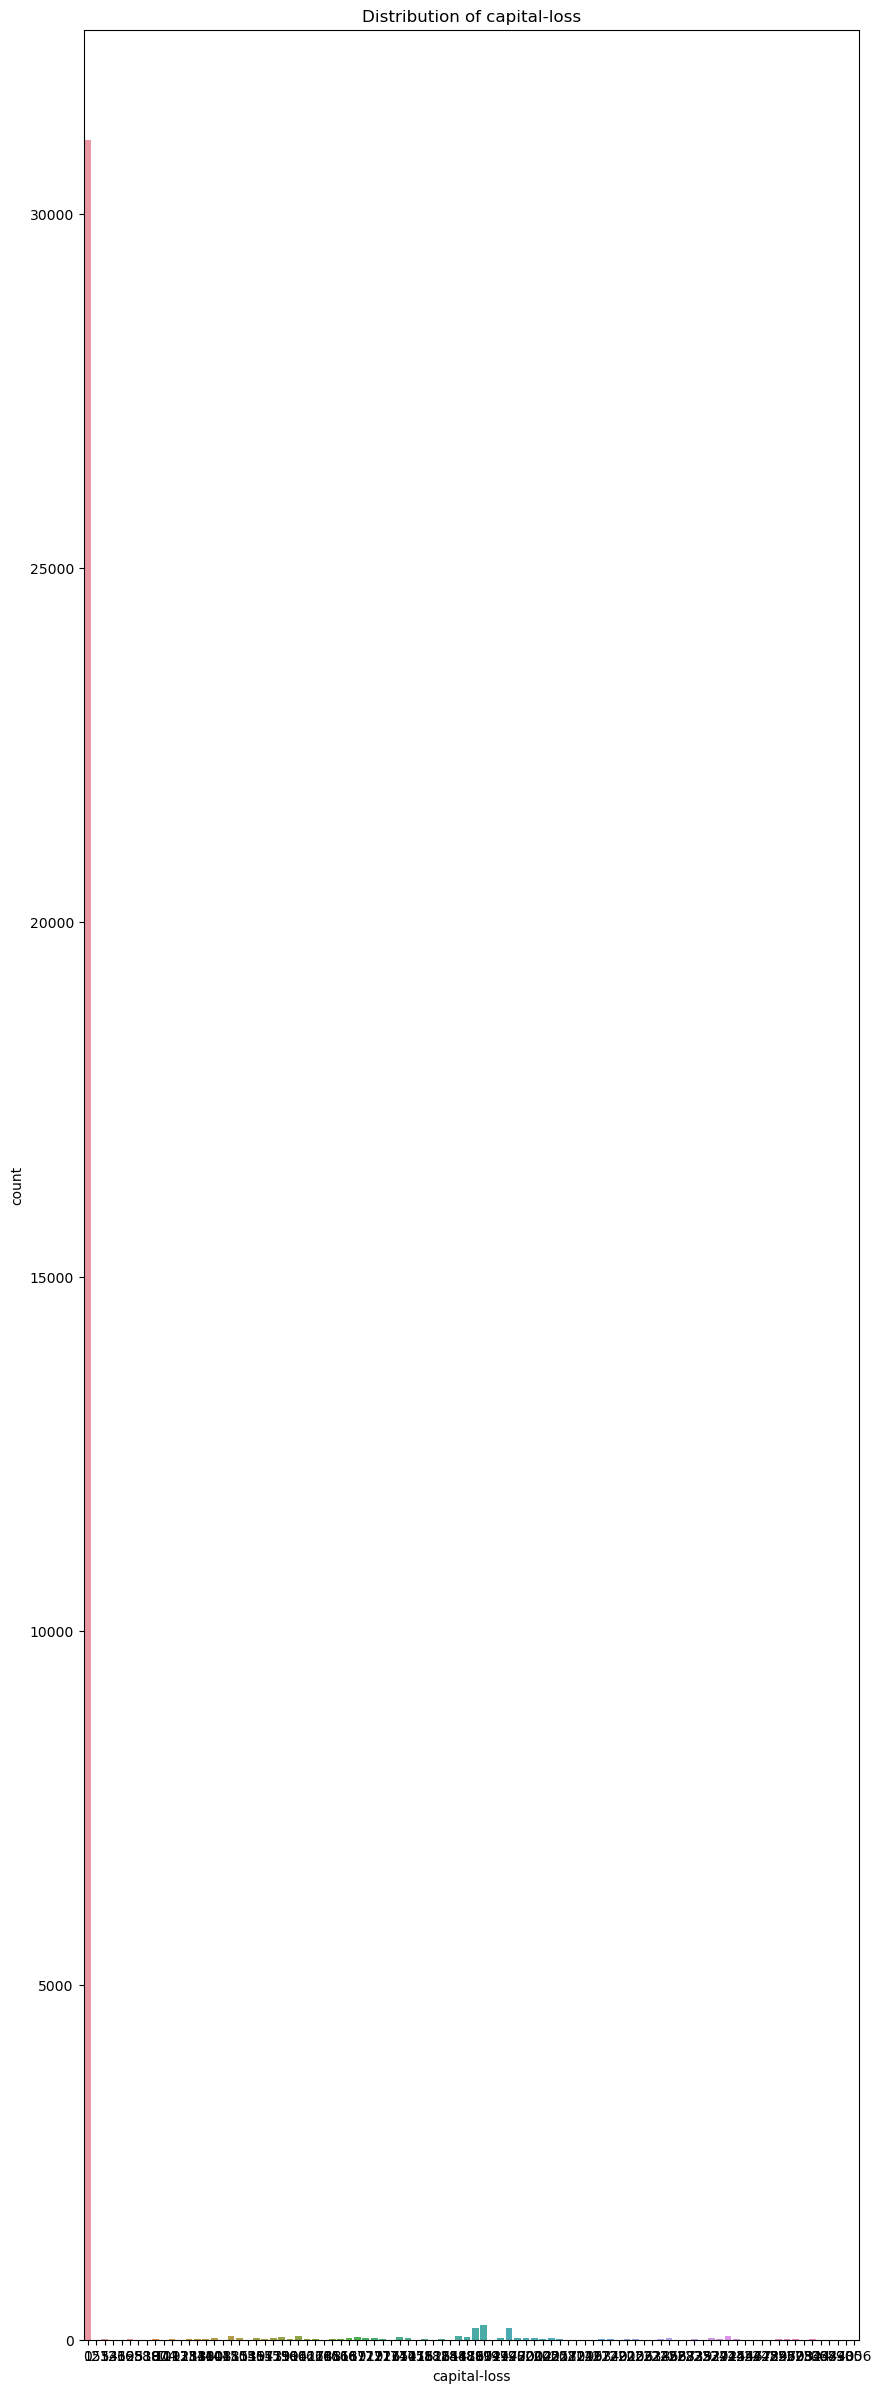

In [7]:
cat_col=['workclass','education','marital-status','occupation','relationship','race','sex','Income','education-num','capital-gain','capital-loss']
for col in cat_col:
    
    plt.figure(figsize=(10,30))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


C:\Users\bisht\AppData\Local\Temp\ipykernel_5352\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

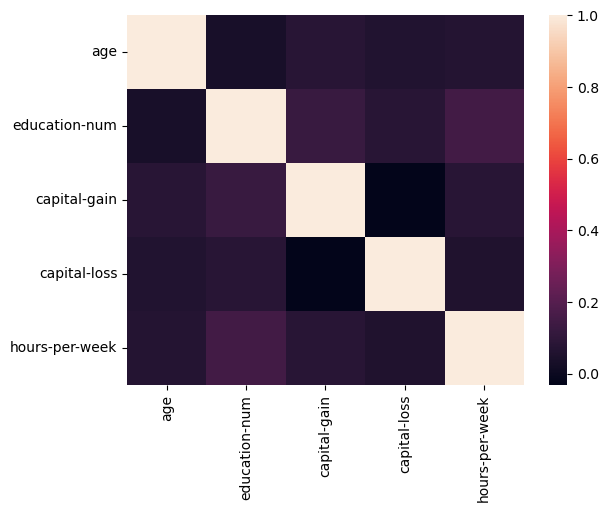

In [8]:
sns.heatmap(df.corr())

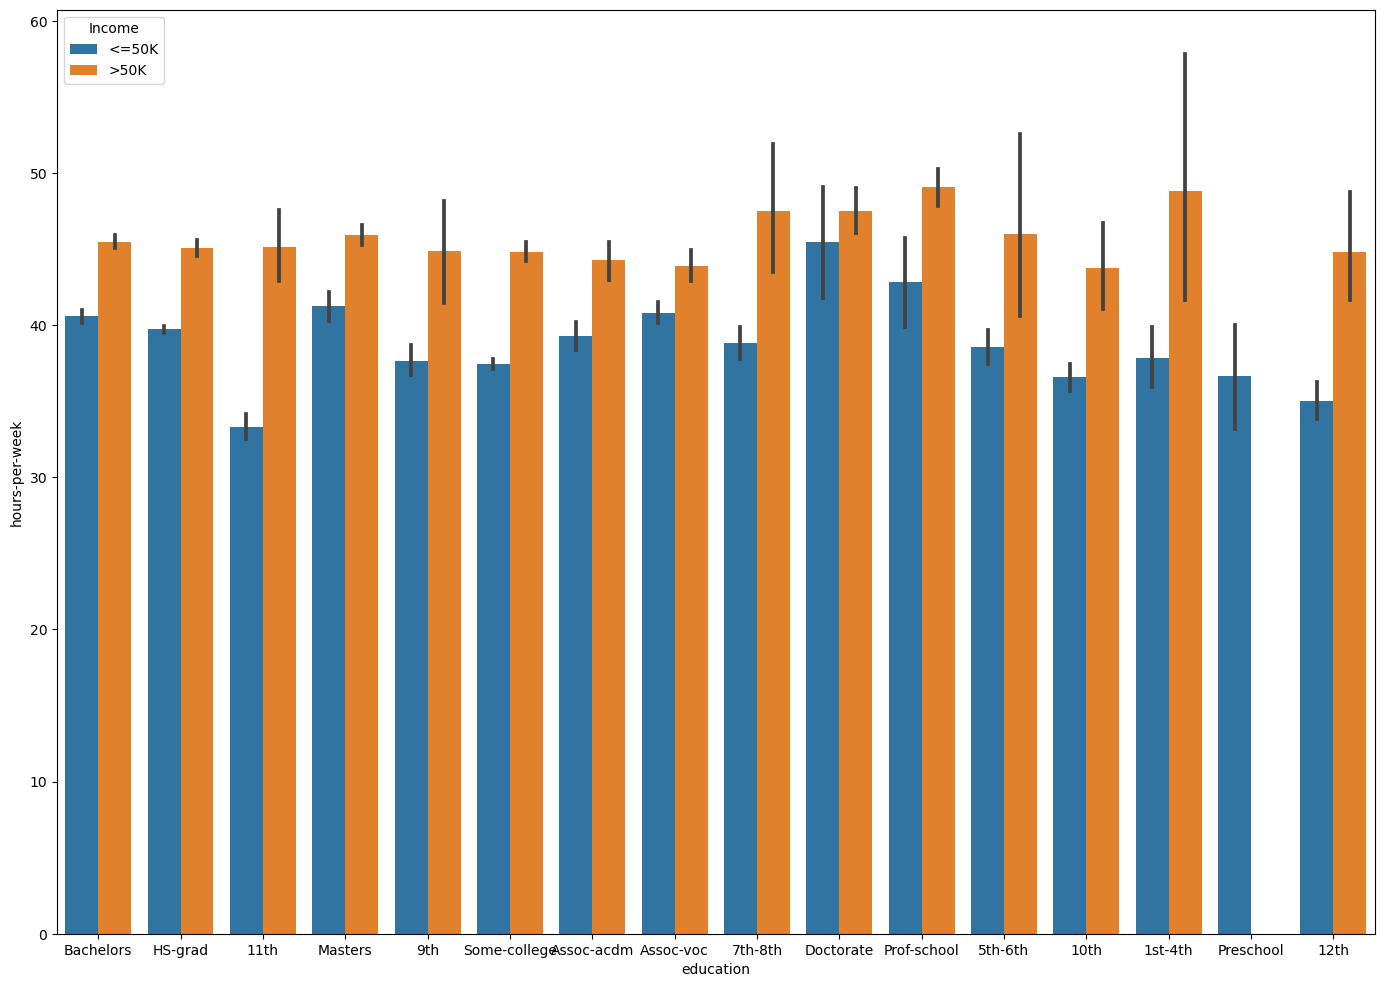

In [9]:
plt.figure(figsize=(17,12))
sns.barplot(x='education',y='hours-per-week',hue='Income',data=df)
plt.show()

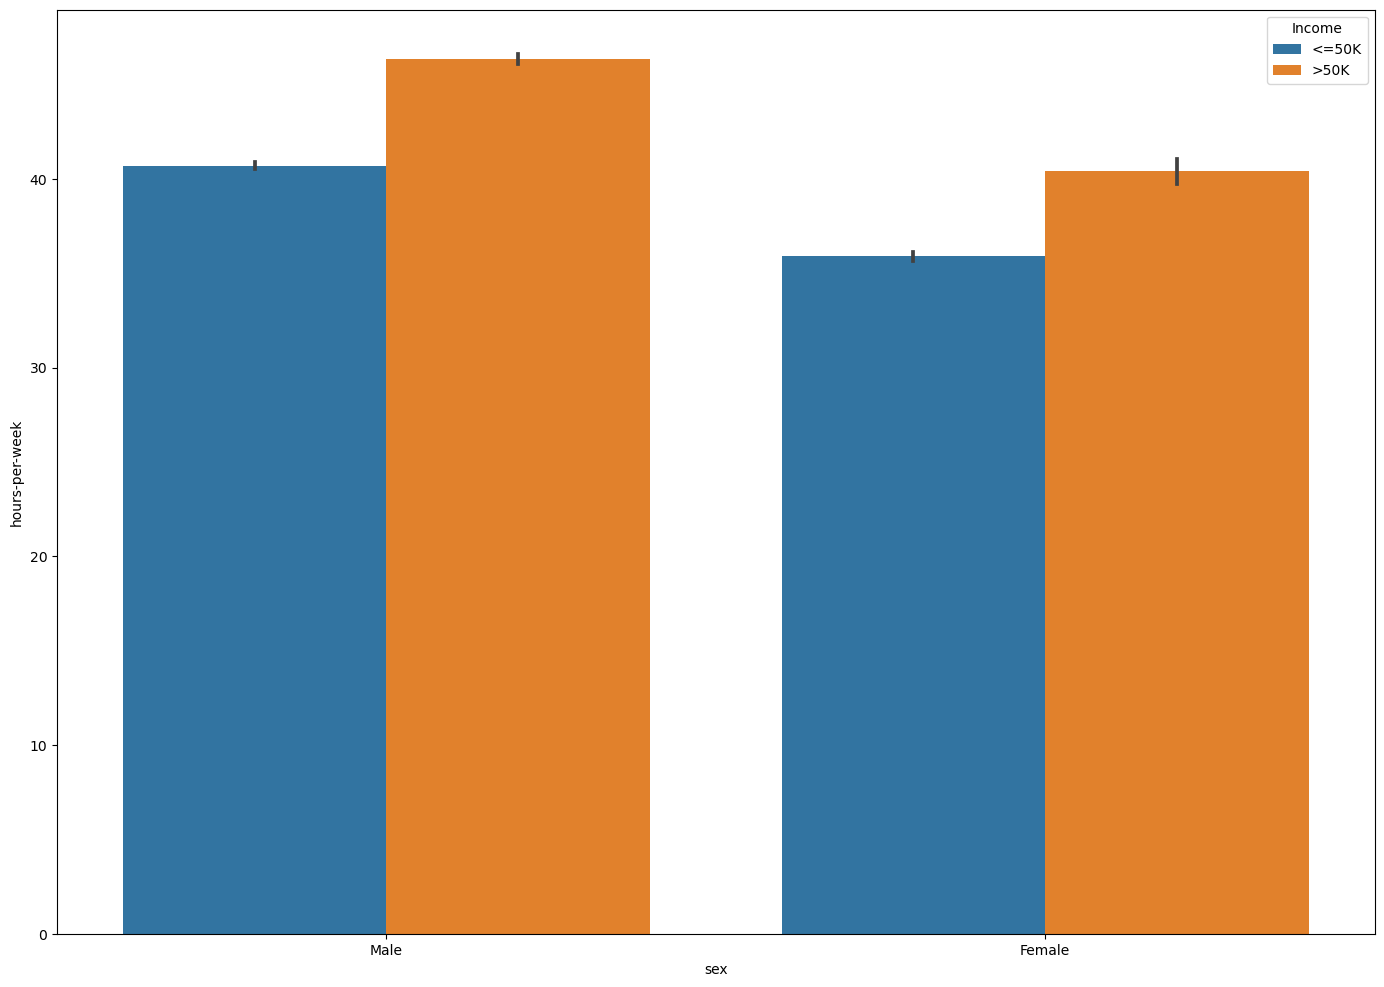

In [10]:
plt.figure(figsize=(17,12))
sns.barplot(x='sex',y='hours-per-week',hue='Income',data=df)
plt.show()

<Axes: xlabel='race', ylabel='hours-per-week'>

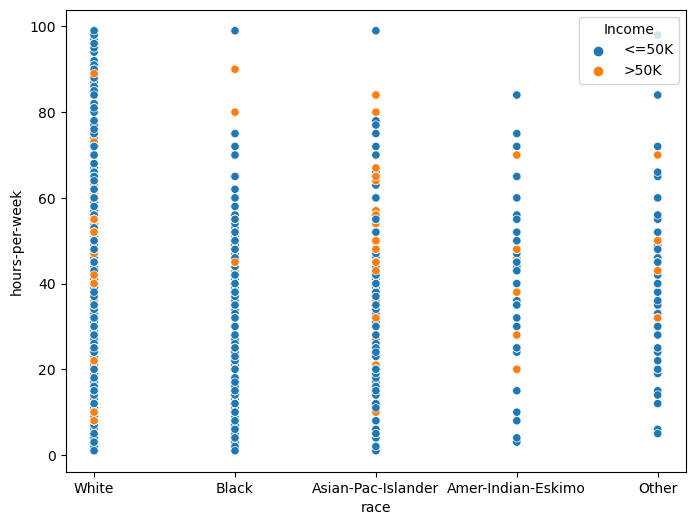

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='race',y='hours-per-week',hue='Income',data=df)

<Axes: xlabel='sex', ylabel='age'>

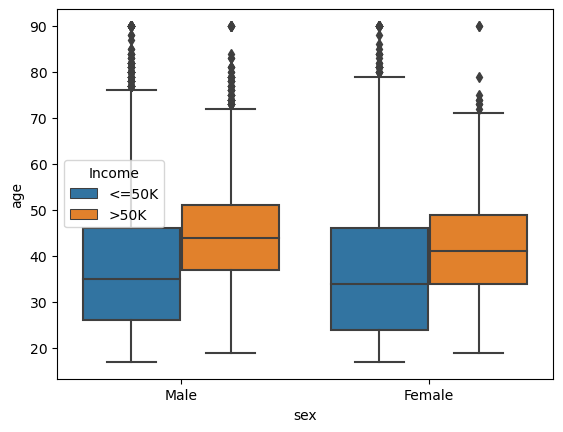

In [12]:
sns.boxplot(x='sex',y='age',hue='Income',data=df)

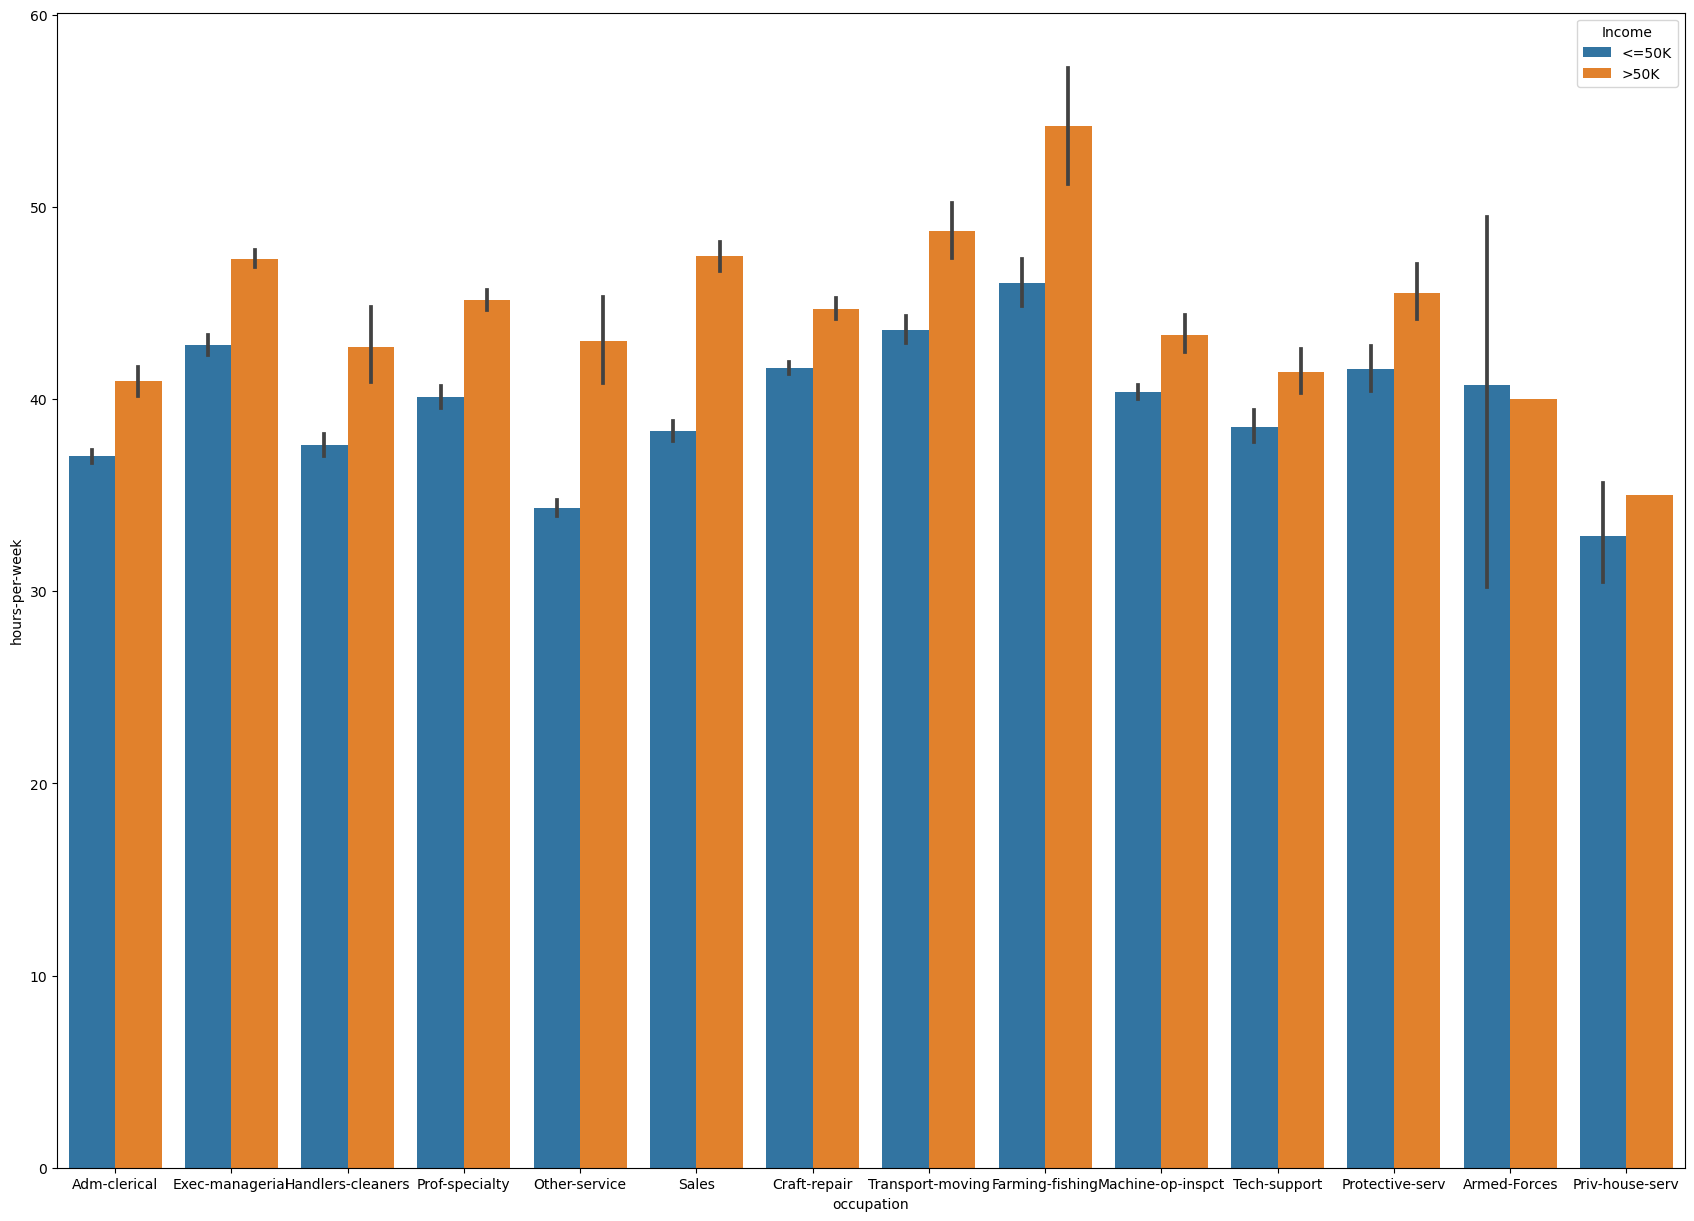

In [13]:
plt.figure(figsize=(21,15))
sns.barplot(x='occupation',y='hours-per-week',hue='Income',data=df)
plt.show()

In [14]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [16]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [17]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [20]:
num_random_values = df['occupation'].isnull().sum()
possible_categories = df['occupation'].dropna().unique()
random_values = np.random.choice(possible_categories,num_random_values)
df.loc[df['occupation'].isnull(),'occupation'] = random_values

In [21]:
df['occupation'].isnull().sum()

0

In [22]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [23]:
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
trf1 = ColumnTransformer(
    transformers=[
        ('Imputation', imputer, ['native-country', 'workclass'])
    ]
)





In [25]:
subset=trf1.fit_transform(df)
subset=pd.DataFrame(subset,columns=['native-country', 'workclass'])

In [26]:
num=[1,4,5,6,7,12]
col = df.columns[num]
for i in col:
    dictt=df[i].value_counts().to_dict()
    df[i]=df[i].map(dictt)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,1298.0,Bachelors,13,10683,3924,8305,27816,Male,2174,0,40,29170.0,<=50K
1,50,2541.0,Bachelors,13,14976,4215,13193,27816,Male,0,0,13,29170.0,<=50K
2,38,22696.0,HS-grad,9,4443,1503,8305,27816,Male,0,0,40,29170.0,<=50K
3,53,22696.0,11th,7,14976,1503,13193,3124,Male,0,0,40,29170.0,<=50K
4,28,22696.0,Bachelors,13,14976,4258,1568,3124,Female,0,0,40,95.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,22696.0,Assoc-acdm,12,14976,1055,1568,27816,Female,0,0,38,29170.0,<=50K
32557,40,22696.0,HS-grad,9,14976,2117,13193,27816,Male,0,0,40,29170.0,>50K
32558,58,22696.0,HS-grad,9,993,3924,3446,27816,Female,0,0,40,29170.0,<=50K
32559,22,22696.0,HS-grad,9,10683,3924,5068,27816,Male,0,0,20,29170.0,<=50K


In [27]:
df[['native-country','workclass']]=subset

In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
le=LabelEncoder()
y=le.fit_transform(y)

In [30]:
df['Income'].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [31]:
Oe=OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']]
)

In [32]:
X['education']=Oe.fit_transform(X[['education']])

In [33]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
ohe=ohe.fit_transform(X[['sex']])
X['sex']=pd.DataFrame(ohe)

C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,12.0,13,10683,3924,8305,27816,1.0,2174,0,40,United-States
1,50,Self-emp-not-inc,12.0,13,14976,4215,13193,27816,1.0,0,0,13,United-States
2,38,Private,8.0,9,4443,1503,8305,27816,1.0,0,0,40,United-States
3,53,Private,6.0,7,14976,1503,13193,3124,1.0,0,0,40,United-States
4,28,Private,12.0,13,14976,4258,1568,3124,0.0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,10.0,12,14976,1055,1568,27816,0.0,0,0,38,United-States
32557,40,Private,8.0,9,14976,2117,13193,27816,1.0,0,0,40,United-States
32558,58,Private,8.0,9,993,3924,3446,27816,0.0,0,0,40,United-States
32559,22,Private,8.0,9,10683,3924,5068,27816,1.0,0,0,20,United-States


<Axes: >

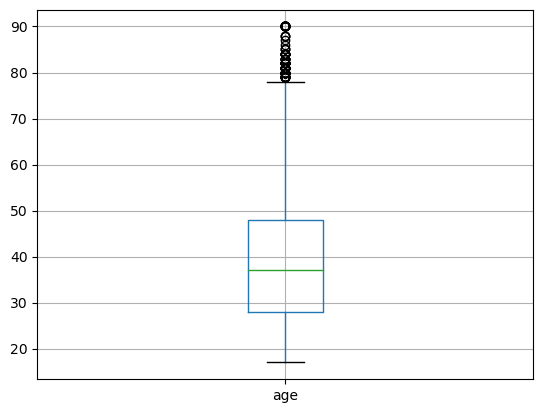

In [35]:
X.boxplot(column='age')

In [36]:
percentile25=df['age'].quantile(0.25)
percentile75=df['age'].quantile(0.75)

In [37]:
iqr=percentile75-percentile25
iqr

20.0

In [38]:
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile75-1.5*iqr
print("Upper Limit",upperlimit)
print("Lower Limit",lowerlimit)

Upper Limit 78.0
Lower Limit 18.0


In [39]:
print("Outlier in UCL",df[df['age']>upperlimit])
print("Outlier in UCL",df[df['age']<lowerlimit])

Outlier in UCL        age         workclass     education  education-num  marital-status  \
74      79           Private  Some-college             10           14976   
222     90           Private       HS-grad              9           10683   
430     80           Private       HS-grad              9             993   
918     81  Self-emp-not-inc       HS-grad              9           14976   
1040    90           Private       HS-grad              9           10683   
...    ...               ...           ...            ...             ...   
32277   90           Private       HS-grad              9             993   
32367   90         Local-gov       7th-8th              4           14976   
32459   85           Private     Bachelors             13           14976   
32494   82           Private       HS-grad              9           10683   
32525   81           Private     Assoc-voc             11            4443   

       occupation  relationship   race     sex  capital-gain

In [40]:
## we dont drop the outlier as we are going to use  ML model that are less sensitive to outlier

In [41]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,12.0,13,10683,3924,8305,27816,1.0,2174,0,40,United-States
1,50,Self-emp-not-inc,12.0,13,14976,4215,13193,27816,1.0,0,0,13,United-States
2,38,Private,8.0,9,4443,1503,8305,27816,1.0,0,0,40,United-States
3,53,Private,6.0,7,14976,1503,13193,3124,1.0,0,0,40,United-States
4,28,Private,12.0,13,14976,4258,1568,3124,0.0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,10.0,12,14976,1055,1568,27816,0.0,0,0,38,United-States
32557,40,Private,8.0,9,14976,2117,13193,27816,1.0,0,0,40,United-States
32558,58,Private,8.0,9,993,3924,3446,27816,0.0,0,0,40,United-States
32559,22,Private,8.0,9,10683,3924,5068,27816,1.0,0,0,20,United-States


# Feature Selection

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [44]:
###Using RandomForest Classifier

In [45]:
sfs=SFS(RandomForestClassifier(),k_features='best',forward=False,floating=False,scoring='accuracy',cv=5)

In [46]:
sfs.fit(X_train,y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Private'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Self-emp-not-inc'


In [ ]:
sfs.k_feature_idx_

In [ ]:
metrics_df=pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
metrics_df['observation']=X.shape[0]
metrics_df['num_features']=metrics_df['feature_idx'].apply(lambda x:len(x))


In [ ]:
metrics_df

In [ ]:
### Using KNN
sfs1=SFS(KNeighborsClassifier(),k_features='best',forward=False,floating=False,scoring='accuracy',cv=5)

In [ ]:
sfs1.fit(X_train,y_train)

In [ ]:
sfs1.k_feature_idx_

In [ ]:
metrics_df=pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [ ]:
metrics_df

In [ ]:
### we find that Knn gives the better accuracy and the features that give a good 
## prediction are (2, 3, 6, 7, 9, 10, 11)

# Model Fitting

In [ ]:
X_train_sel=sfs1.transform(X_train)
X_test_sel=sfs1.transform(X_test)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_sel,y_train)

In [ ]:
pred=knn.predict(X_test_sel)

In [ ]:
accuracy_score(pred,y_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(pred,y_test))

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train_sel,y_train)

In [ ]:
pred=knn.predict(X_test_sel)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(pred,y_test))